In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
sns.set_style("whitegrid")
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from datetime import datetime 
from datetime import timedelta
from sklearn.metrics import mean_squared_error
import statistics
from sklearn.metrics import mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

import statsmodels.api as sm
from sklearn import metrics
from sklearn.metrics import mean_squared_error as mse

In [2]:
#Reading all files 
store=pd.read_csv('D:/Analytix labs/Assignments & Case Studies/Final Projects/2. Walmart Store Sales Forecasting/data/stores.csv')
feature=pd.read_csv('D:/Analytix labs/Assignments & Case Studies/Final Projects/2. Walmart Store Sales Forecasting/data/features.csv')
train=pd.read_csv('D:/Analytix labs/Assignments & Case Studies/Final Projects/2. Walmart Store Sales Forecasting/data/train.csv')
test=pd.read_csv('D:/Analytix labs/Assignments & Case Studies/Final Projects/2. Walmart Store Sales Forecasting/data/test.csv')

# For Output_excel file...
writer=pd.ExcelWriter('Walmart Store Sales Prediction output.xlsx', engine='xlsxwriter')

In [3]:
feature.head(2)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True


In [4]:
store.head(2)

,Store,Type,Size
0,1,A,151315
1,2,A,202307


# Missing value Treatment

In [5]:
#finding null values in feature file
feature.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [6]:
#checking null values for file store
store.isnull().sum()

Store    0
Type     0
Size     0
dtype: int64

In [7]:
#filling null value by mean for unemployement and cpi
feature['Unemployment'].fillna(feature['Unemployment'].mean(),inplace=True)
feature['CPI'].fillna(feature['CPI'].mean(),inplace=True)

In [8]:
#filling null value by zero for markdowns
feature['MarkDown1'] = feature['MarkDown1'].fillna(0)
feature['MarkDown2'] = feature['MarkDown2'].fillna(0)
feature['MarkDown3'] = feature['MarkDown3'].fillna(0)
feature['MarkDown4'] = feature['MarkDown4'].fillna(0)
feature['MarkDown5'] = feature['MarkDown5'].fillna(0)

In [9]:
feature.head(2)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,True


In [10]:
#checking for null value again if any left
feature.isnull().sum()

Store           0
Date            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday       0
dtype: int64

# Merging the data

In [11]:
#merging feature, store and train
data = pd.merge(feature, train, on=['Store','Date','IsHoliday'], how='inner')

In [13]:
#merging store also
training = pd.merge(data, store, how='inner',on=['Store'])

In [14]:
#checking data after merging
training.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size
0,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,1,24924.50,A,151315
1,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,2,50605.27,A,151315
2,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,3,13740.12,A,151315
3,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,4,39954.04,A,151315
4,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,5,32229.38,A,151315


In [15]:
#merging feature, store and test
test_bt = pd.merge(test,feature)
test= pd.merge(test_bt,store)
#checking data after merging
test.head()

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,A,151315
1,1,2,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,A,151315
2,1,3,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,A,151315
3,1,4,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,A,151315
4,1,5,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,A,151315


# Converting Categorical Variable 'Type' into Numerical Variable 

In [16]:
train_test_data = [training, test]

In [17]:
type_mapping = {"A": 1, "B": 2, "C": 3}
for dataset in train_test_data:
    dataset['Type'] = dataset['Type'].map(type_mapping)

In [18]:
#covert categorical into numerical in isholiday (false=0,true=1)
type_mapping = {False: 0, True: 1}
for dataset in train_test_data:
    dataset['IsHoliday'] = dataset['IsHoliday'].map(type_mapping)

In [19]:
training.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size
0,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,1,24924.50,1,151315
1,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,2,50605.27,1,151315
2,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,3,13740.12,1,151315
3,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,4,39954.04,1,151315
4,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,5,32229.38,1,151315


In [20]:
test.head()

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2012-11-02,0,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,1,151315
1,1,2,2012-11-02,0,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,1,151315
2,1,3,2012-11-02,0,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,1,151315
3,1,4,2012-11-02,0,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,1,151315
4,1,5,2012-11-02,0,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,1,151315


# Date Features

In [21]:
training['Date'] = pd.to_datetime(training['Date'])
test['Date'] = pd.to_datetime(test['Date'])

In [22]:
# Extract date features
training['Date_dayofweek'] =training['Date'].dt.dayofweek
training['Date_month'] =training['Date'].dt.month 
training['Date_year'] =training['Date'].dt.year
training['Date_day'] =training['Date'].dt.day

test['Date_dayofweek'] =test['Date'].dt.dayofweek
test['Date_month'] =test['Date'].dt.month 
test['Date_year'] =test['Date'].dt.year
test['Date_day'] =test['Date'].dt.day

 - Making New Holiday Variable Based on Christmas.

In [23]:
training['Christmas'] = np.where((training['Date']==datetime(2010, 12, 31)) |
                              (training['Date']==datetime(2011, 12, 30)) | 
                              (training['Date']==datetime(2012, 12, 28)) | 
                              (training['Date']==datetime(2013, 12, 27)),1,0)

test['Christmas'] = np.where((test['Date']==datetime(2010, 12, 31)) |
                              (test['Date']==datetime(2011, 12, 30)) | 
                              (test['Date']==datetime(2012, 12, 28)) | 
                              (test['Date']==datetime(2013, 12, 27)),1,0)

[]

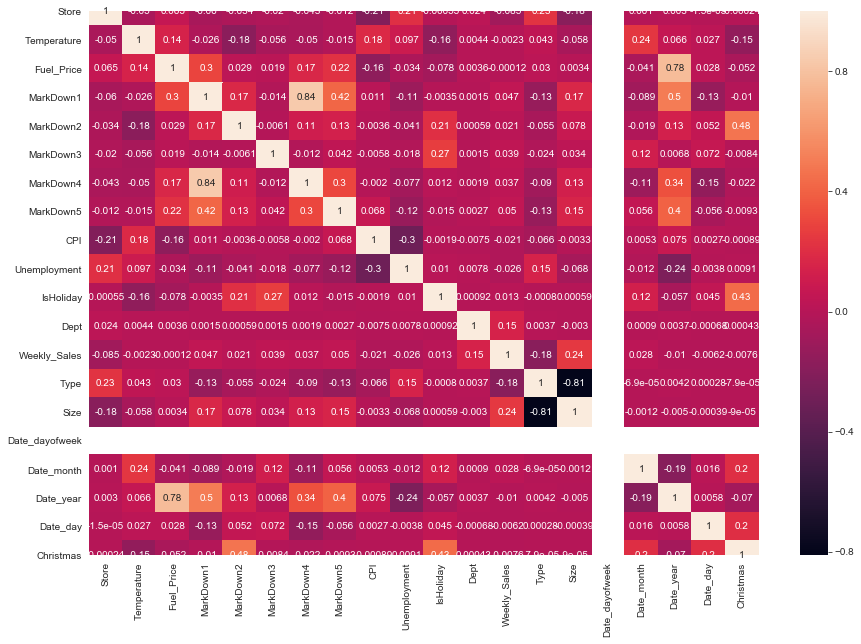

In [24]:
#Checking correlation on training data.
corr = training.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True)
plt.plot()

[]

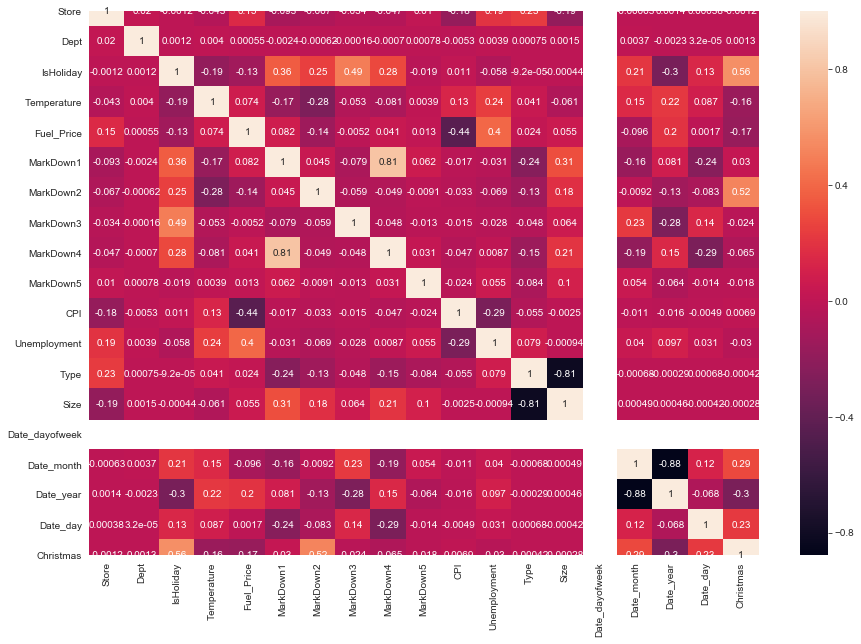

In [25]:
#Checking correlation on testing data.
corr1 = test.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr1, annot=True)
plt.plot()

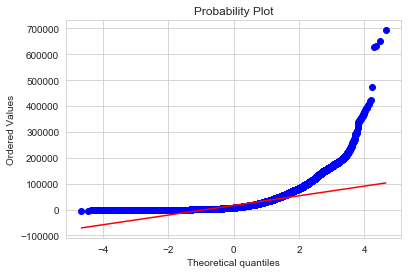

In [26]:
# Now checking residuals
from scipy import stats
import pylab

stats.probplot(training.Weekly_Sales, dist="norm", plot=pylab )
pylab.show()

In [27]:
#Dropping irrelevant variables

In [28]:
features_drop=['Unemployment','CPI','MarkDown5']
training=training.drop(features_drop, axis=1)
test=test.drop(features_drop, axis=1)

# Splitting data in to train and test

In [29]:
#train_x,test_x,train_y,test_y = train_test_split(training,training['Weekly_Sales'],test_size =0.2,random_state=32)

In [30]:
train_x=training.drop(['Weekly_Sales','Date'], axis=1)
train_y=training['Weekly_Sales'] 
test_x=test.drop('Date',axis=1).copy()
train_x.shape, train_y.shape, test_x.shape

((421570, 16), (421570,), (115064, 16))

# Building models & comparing their RMSE values

# 1) Linear regression

In [31]:
Linear = LinearRegression()
Linear.fit(train_x, train_y)
pred_y = Linear.predict(test_x)

In [32]:
acc_linear=round( Linear.score(train_x, train_y) * 100, 2)
print ('score:'+str(acc_linear) + ' percent')

score:8.67 percent


# 2) Decision Tree

In [33]:
dt=DecisionTreeRegressor(criterion='mse',max_depth=10,min_samples_split=5, min_samples_leaf=2)
dt.fit(train_x, train_y)
y_pred_dt= dt.predict(test_x)
acc_dt = round( dt.score(train_x, train_y) * 100, 2)
print (str(acc_dt) + ' percent')

87.3 percent


# 3) Random Forest

In [34]:
dt = RandomForestRegressor(n_estimators=10, max_depth=5,min_samples_split=2,min_samples_leaf=1)
dt.fit(train_x, train_y)
y_pred_rf=dt.predict(test_x)
acc_rf= round(dt.score(train_x, train_y) * 100, 2)
print ("Accuracy: %i %% \n"%acc_rf)

Accuracy: 59 % 



Comparing Models - 
Let's compare the accuracy score of all the regression models used above.

In [35]:
models = pd.DataFrame({
    'Model': ['Linear Regression','Random Forest','Decision Tree'],
    
    'Score': [acc_linear, acc_rf,acc_dt]
    })

models.sort_values(by='Score', ascending=False)

,Model,Score
2,Decision Tree,87.30
1,Random Forest,59.24
0,Linear Regression,8.67


Predicting Sales value for test data based on highest score model.

In [36]:
submission = pd.DataFrame({
        "Store_Dept_Date": test.Store.astype(str)+'_'+test.Dept.astype(str)+'_'+test.Date.astype(str),
        "Weekly_Sales": y_pred_dt
    })

submission.to_csv('weekly_sales predicted.csv', index=False)
submission.to_excel(writer,'Weekly_sales Pred',index=False)

In [37]:
submission.head()

,Store_Dept_Date,Weekly_Sales
0,1_1_2012-11-02,536.25
1,1_2_2012-11-02,536.25
2,1_3_2012-11-02,536.25
3,1_4_2012-11-02,536.25
4,1_5_2012-11-02,536.25
